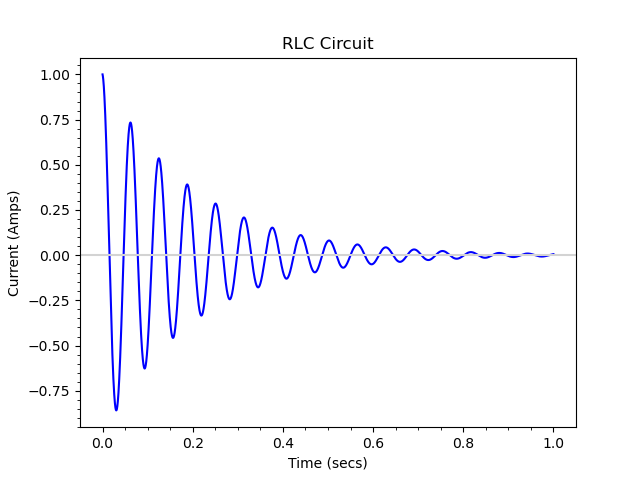

In [20]:
#rlc_circuit.ipynb

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from scipy.integrate import solve_ivp

def model(t, state_vector, phase1, phase2):
    d_I, I = state_vector
    
    I_d2 = (phase1) * d_I + phase2 * I
    I_d = d_I
    
    return I_d2, I_d

def plot(ax):
    R = 0.1
    L = 0.01
    C = 0.01
    
    phase1 = -R/L
    phase2 = -1/(L*C)
    
    I_d_init = 0
    I_init = 1
    
    t_init = 0
    t_fin = 1
    
    sol = solve_ivp(
        model,
        (t_init, t_fin),
        [I_init, I_d_init],
        max_step = 0.0001,
        args=[phase1, phase2],
    )
    
    time_steps = sol.t
    current = sol.y[0]
    
    ax.plot(time_steps, current, color="blue")
    
    ax.set_title(f"RLC Circuit")
    ax.set_xlabel(f"Time (secs)")
    ax.set_ylabel("Current (Amps)")

    ax.axhline(y=0.0, color="lightgray")
    
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    
    
def main():
    plt.close("all")
    fig = plt.figure(" ")
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax)
    plt.show()


main()